# 1.0 Importing libraries

In [ ]:
# Importing Pandas
# 
import pandas as pd

In [ ]:
# Importing Numpy
#
import numpy as np

In [ ]:
# Importing Seaborn
#
import seaborn as sns

In [ ]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

# 1.1 Importing File

In [ ]:
data1=pd.read_csv("Financial Dataset - 1.csv")
# Cheking the first 5 entries into our dataset 
data1.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data2=pd.read_csv("VariableDefinitions.csv")
# Cheking the first 5 entries into our dataset 
data2.head(5)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


# 1.2 Data cleaning

Checking for duplicates

In [ ]:
# Cheking if our dataset contains any duplicate values
data1.duplicated().values.any()

False

Checking for null values

In [ ]:
#Cheking the sum of msissing values in our columns
data1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

Taking care of missing values

Removing rows we dont need with null values

In [ ]:
data1.dropna(subset=['country','Has a Bank account'], inplace=True)
data1.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Filling the missing values in the string with a ' . '



In [ ]:
missing_strl = data1[["Type of Location", "Cell Phone Access","gender_of_respondent", "The relathip with head"
,"marital_status","Level of Educuation","Type of Job",]]

#Creating a for loop to iterate over the column names in missing_strl and where there is a nan value it repalces with a dot instead
for i in missing_strl:
  data1[i].replace(np.nan, ".", inplace= True)

data1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Replacing int null values with ' 0 '

In [ ]:
missing_strl2 = data1[["household_size"]]

#Creating a for loop to iterate over the column names in missing_strl and where there is a nan value it repalces with a dot instead
for i in missing_strl2:
  data1[i].replace(np.nan, "0", inplace= True)

data1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data1.dropna(subset=['Respondent Age'], how='all', inplace=True)

In [ ]:
#Cheking the sum of msissing values in our columns
data1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

Checking for outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f544771ee90>]],
      dtype=object)

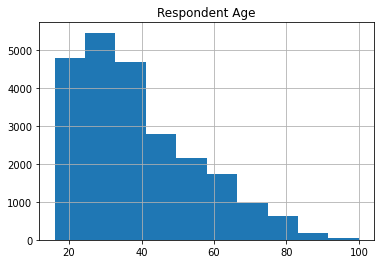

In [ ]:
data1.hist(column = [  'Respondent Age'])

From the histogram above, we can se that majority of the people are between the age of 20-40

# 1.3 Univariate Analysis

Categorical Variables

Frequency table

In [ ]:
data1.country.value_counts()

Rwanda      8722
Tanzania    6556
Kenya       6064
Uganda      2101
Name: country, dtype: int64

Gender frequency table

In [ ]:
data1.gender_of_respondent.value_counts()

Female    13811
Male       9606
.            26
Name: gender_of_respondent, dtype: int64

Renaming bank account column

In [ ]:
#data1.rename({'Has a Bank account': 'Bank_account'}, axis=1)
data11=data1.rename(columns={'Has a Bank account':'Bank_account'})
data11

,country,year,uniqueid,Bank_account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Renaming columns 

In [ ]:
data12=data11.rename({'Respondent Age': 'Age','Type of Location': 'Location','Cell Phone Access':'cell','Level of Educuation': 'Education','Type of Job': 'Job','The relathip with head': 'Relationship'}, axis=1)
data12

,country,year,uniqueid,Bank_account,Location,cell,household_size,Age,gender_of_respondent,Relationship,marital_status,Education,Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
data12.Bank_account.value_counts()

No     20137
Yes     3306
Name: Bank_account, dtype: int64

Bar charts

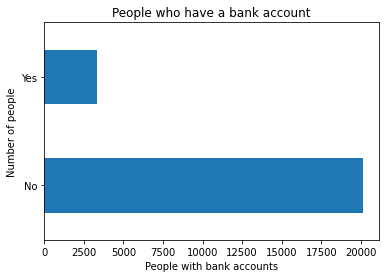

In [ ]:
# Labelling our x axis
plt.xlabel("People with bank accounts")

# Labelling our y axis
plt.ylabel("Number of people")

# Giving a title to our Bar chart
plt.title("People who have a bank account")

# Displaying our chart
data11.Bank_account.value_counts().plot(kind = 'barh')

From the bar graph, we can see that there are fewer people with Bank accounts compared to those who dont have

Pie charts

People with cells vs people without cells

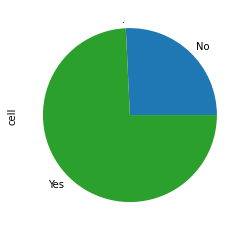

In [ ]:
data12.cell.value_counts(sort=False).plot.pie()
plt.show()

From the pie chart we can see that majority of the people have access to cell phones

Numerical Variables


Measures of Central Tendancy

In [ ]:
#data1.drop(data1.loc[data1['Respondent Age']==0].index, inplace=True)

#data13=data12.drop(data12.index[data1['Respondent Age'] == '0'], inplace = True)
data13=data12[data12.Age!= 0]
data13



,country,year,uniqueid,Bank_account,Location,cell,household_size,Age,gender_of_respondent,Relationship,marital_status,Education,Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
data13=data12[data12.household_size!= 0]
data13


,country,year,uniqueid,Bank_account,Location,cell,household_size,Age,gender_of_respondent,Relationship,marital_status,Education,Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Finding the mean of House hold size

In [ ]:
data13["Age"].mode()

0    30.0
dtype: float64

Median

In [ ]:
data12["household_size"].median()

3.0

Mode

In [ ]:
data12["household_size"].mode()

0    2
dtype: object

Measure of dispersion

#1.4 Bivariate Analysis





 Numerical and Numerical 

Scatter Plots

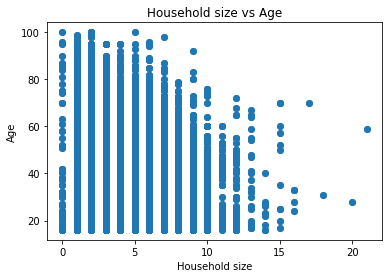

In [ ]:




# Previewing our dataset
data12.head()

# Using Pandas: Plotting our scatterplot to compare the variables
data12.plot(x = 'household_size', y = 'Age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(data12["household_size"] , data12["Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = data12["household_size"], y = data12["Age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('Household size vs Age')

# Labelling our x axis
plt.xlabel('Household size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()



From the scatter plot above we can see that majority of the higher age are between 0-5 household size

Correlation

In [ ]:
#data13=data12.to_numeric("household_size")
#data12.infer_objects(data12["household_size"])
#data12.to_numeric(data12['Age'])
data12["household_size"]=data12.to_numeric(data12["household_size"], downcast="float")

AttributeError: ignored

In [ ]:




# Previewing the dataframe
data12.head()

# Calculating the pearson coefficient
data12["household_size"].corr(data12["Age"])


# When the value of the correlation coefficient is close to zero, generally between -0.1 and +0.1, 
# the variables are said to have no linear relationship or a very weak linear relationship. 
# Thus in this example sepal length and sepal width have a very weak negative correlation.

TypeError: ignored

Categorical and Categorical

Stacked Column Chart

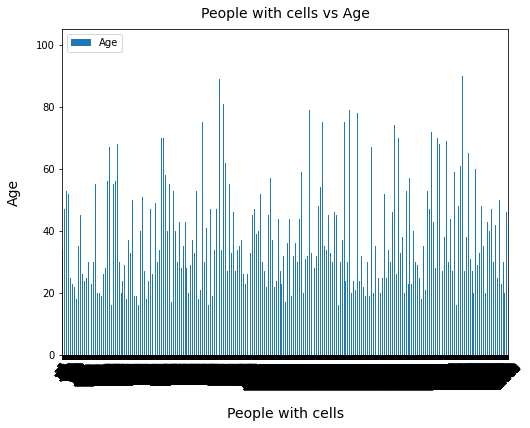

In [ ]:




data12[['Age','cell', 'Bank_account']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("People with cells vs Age", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Age", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("People with cells", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

 Categorical and Numerical

Line charts

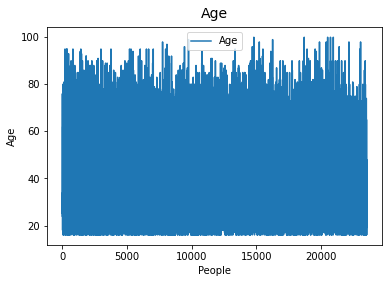

In [ ]:


# Plotting our line graph
data12[["Age"]].plot()

# Giving a title to our line graph
plt.title("Age", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Age')

# Labelling the x-axis
plt.xlabel('People')

# Displaying our graph
plt.show()

# Multivariate Analysis I (Exploratory Data Analysis) 

PCA

In [ ]:
# Step 2: Let's take a look at what our dataset looks like:
#
data12.head()

,country,year,uniqueid,Bank_account,Location,cell,household_size,Age,gender_of_respondent,Relationship,marital_status,Education,Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#data13= data12.drop(['gender_of_respondent', 'Education', 'Age','country','year','uniqueid','Bank_account','Location','cell','gender_of_respondent','Relationship','marital_status','Job'],axis=1,inplace=True)
#X = data13.drop(['gender_of_respondent', 'Education', 'Age','country','year','uniqueid','Bank_account','Location','cell','gender_of_respondent','Relationship','marital_status','Job'],axis=1,inplace=True)
X = data12['Age']
y = data12['Bank_account']

In [ ]:

#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NotFittedError: ignored

## Factor Analysis

In [ ]:
# Step 2: Previewing the dataset columns
# 
data12.columns

Index(['country', 'year', 'uniqueid', 'Bank_account', 'Location', 'cell',
       'household_size', 'Age', 'gender_of_respondent', 'Relationship',
       'marital_status', 'Education', 'Job'],
      dtype='object')

In [ ]:
# Step 3: Dropping unnecessary columns 
# 
data12.drop(['gender_of_respondent', 'Education', 'Age'],axis=1,inplace=True)

In [ ]:
# Step 4: Dropping missing values rows
#
data12.dropna(inplace=True)

In [ ]:
# Step 6: Checking the datatypes
# 
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23443 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         23443 non-null  object
 1   year            23443 non-null  int64 
 2   uniqueid        23443 non-null  object
 3   Bank_account    23443 non-null  object
 4   Location        23443 non-null  object
 5   cell            23443 non-null  object
 6   household_size  23443 non-null  object
 7   Relationship    23443 non-null  object
 8   marital_status  23443 non-null  object
 9   Job             23443 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
# Step 7: Previewing our dataset
# 
data12.head()

,country,year,uniqueid,Bank_account,Location,cell,household_size,Relationship,marital_status,Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,Spouse,Married/Living together,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,Head of Household,Widowed,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,Other relative,Single/Never Married,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,Head of Household,Married/Living together,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,Child,Single/Never Married,Informally employed


In [ ]:

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(data12)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(-0.0, 0.0)

In [ ]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data12)


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:144: RuntimeWarning: invalid value encountered in true_divide
  kmo_per_item = corr_sum / (corr_sum + partial_corr_sum)


ValueError: ignored